# Práctica 3: Aproximación Normal por Sumas (Teorema Central del Límite)

## Objetivos
1.  Construir una variable aleatoria a partir de la suma de 12 lanzamientos de un dado.
2.  Verificar visualmente la forma de campana de la distribución de las sumas.
3.  Comprobar si los porcentajes de datos dentro de $\pm1\sigma$ y $\pm2\sigma$ se corresponden con los de una distribución normal.
4.  Contrastar el ajuste a una distribución normal mediante una prueba de Chi-cuadrado.

## Idea Base: Teorema Central del Límite (CLT)
El Teorema Central del Límite establece que, bajo ciertas condiciones, la suma de un gran número de variables aleatorias independientes y de idéntica distribución se aproximará a una distribución normal, sin importar la distribución original de las variables.

En este caso, la variable es la suma $S$ del resultado de 12 lanzamientos de un dado.
$S = X_1 + X_2 + \dots + X_{12}$

Por el CLT, esperamos que la distribución de $S$ se aproxime a una normal:
$S \sim \mathcal{N}(\mu_S, \sigma_S^2)$

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, chi2

# Cargar los datos
df = pd.read_csv('datos_practica3.csv')

# Renombrar la columna del resultado de la suma
df.columns = ['experimento', 'lanzamientos', 'suma']

# Mostrar los primeros 5 experimentos
df

,experimento,lanzamientos,suma
0,1,12,43
1,2,12,38
2,3,12,45
3,4,12,41
4,5,12,42
...,...,...,...
95,96,12,45
96,97,12,40
97,98,12,46
98,99,12,41


## Parámetros Teóricos de la Suma

Para un solo lanzamiento de un dado ($X_i$), la media y la varianza son:
- $\mu_X = E[X_i] = \frac{1+2+3+4+5+6}{6} = 3.5$
- $\sigma_X^2 = \text{Var}(X_i) = E[X_i^2] - (E[X_i])^2 = \frac{1^2+2^2+3^2+4^2+5^2+6^2}{6} - (3.5)^2 = \frac{91}{6} - 12.25 \approx 2.9167$

Para la suma de $n=12$ lanzamientos ($S = \sum_{i=1}^{12} X_i$):
- **Media teórica:** $\mu_S = n \cdot \mu_X = 12 \cdot 3.5 = 42$
- **Varianza teórica:** $\sigma_S^2 = n \cdot \sigma_X^2 = 12 \cdot \frac{35}{12} = 35$
- **Desviación estándar teórica:** $\sigma_S = \sqrt{35} \approx 5.916$

In [11]:
# Extraer la columna de 'suma'
S_values = df['suma']

# Calcular estadísticos muestrales
media_muestral = np.mean(S_values)
varianza_muestral = np.var(S_values, ddof=1)
std_muestral = np.std(S_values, ddof=1)

# Parámetros teóricos
media_teorica = 42
varianza_teorica = 35
std_teorica = np.sqrt(35)

print("--- Comparación de Parámetros ---")
print(f"Media muestral: {media_muestral:.4f} (Teórica: {media_teorica})")
print(f"Varianza muestral: {varianza_muestral:.4f} (Teórica: {varianza_teorica})")
print(f"Desviación estándar muestral: {std_muestral:.4f} (Teórica: {std_teorica:.4f})")

--- Comparación de Parámetros ---
Media muestral: 42.4100 (Teórica: 42)
Varianza muestral: 6.9918 (Teórica: 35)
Desviación estándar muestral: 2.6442 (Teórica: 5.9161)


## Visualización de la Distribución

Para verificar la aproximación a la normalidad, creamos un histograma de las sumas observadas y lo superponemos con la curva de densidad de probabilidad de una distribución normal con la media y desviación estándar muestrales.

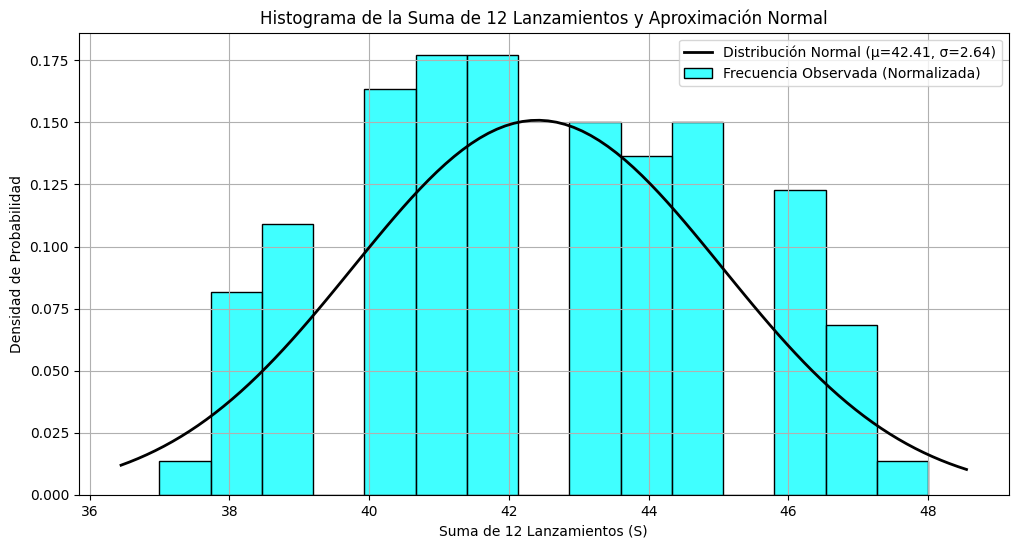

In [12]:
plt.figure(figsize=(12, 6))
sns.histplot(S_values, kde=False, stat='density', bins=15, label='Frecuencia Observada (Normalizada)', color='cyan')

# Superponer la curva normal teórica
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, media_muestral, std_muestral)
plt.plot(x, p, 'k', linewidth=2, label=f'Distribución Normal (μ={media_muestral:.2f}, σ={std_muestral:.2f})')

plt.title('Histograma de la Suma de 12 Lanzamientos y Aproximación Normal')
plt.xlabel('Suma de 12 Lanzamientos (S)')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

## Verificación de Porcentajes (Regla 68-95-99.7)

Una propiedad clave de la distribución normal es que ciertos porcentajes de datos caen dentro de un número específico de desviaciones estándar de la media:
- Aproximadamente el **68%** de los datos se encuentra dentro de $\mu \pm 1\sigma$.
- Aproximadamente el **95%** de los datos se encuentra dentro de $\mu \pm 2\sigma$.
- Aproximadamente el **99.7%** de los datos se encuentra dentro de $\mu \pm 3\sigma$.

Vamos a calcular estos porcentajes para nuestros datos observados.

In [13]:
# Calcular los porcentajes observados
dentro_1_sigma = np.sum((S_values >= media_muestral - std_muestral) & (S_values <= media_muestral + std_muestral)) / len(S_values)
dentro_2_sigma = np.sum((S_values >= media_muestral - 2 * std_muestral) & (S_values <= media_muestral + 2 * std_muestral)) / len(S_values)
dentro_3_sigma = np.sum((S_values >= media_muestral - 3 * std_muestral) & (S_values <= media_muestral + 3 * std_muestral)) / len(S_values)

print("--- Verificación de la Regla Empírica ---")
print(f"Porcentaje de datos dentro de ±1σ: {dentro_1_sigma:.4f} (Esperado: ~0.68)")
print(f"Porcentaje de datos dentro de ±2σ: {dentro_2_sigma:.4f} (Esperado: ~0.95)")
print(f"Porcentaje de datos dentro de ±3σ: {dentro_3_sigma:.4f} (Esperado: ~0.997)")

--- Verificación de la Regla Empírica ---
Porcentaje de datos dentro de ±1σ: 0.7000 (Esperado: ~0.68)
Porcentaje de datos dentro de ±2σ: 0.9800 (Esperado: ~0.95)
Porcentaje de datos dentro de ±3σ: 1.0000 (Esperado: ~0.997)


## Prueba de Bondad de Ajuste Chi-cuadrado ($\chi^2$)

Para una prueba más formal, agrupamos los datos en clases y comparamos las frecuencias observadas con las esperadas bajo una distribución normal.

1.  **Estandarizar los datos:** Convertimos cada suma $S_i$ a un valor $Z_i$ de la normal estándar.
    $Z_i = \frac{S_i - \mu_S}{\sigma_S}$
2.  **Definir clases:** Creamos intervalos (clases) para los valores de $Z$.
3.  **Calcular frecuencias esperadas:** Para cada clase, calculamos la probabilidad teórica usando la función de distribución acumulada (CDF) de la normal estándar y la multiplicamos por el número total de observaciones.
4.  **Aplicar la prueba $\chi^2$:**
    $\chi^2 = \sum_{i=1}^{m} \frac{(O_i - E_i)^2}{E_i}$

**Hipótesis:**
- $H_0$: Los datos de la suma $S$ siguen una distribución normal.
- $H_1$: Los datos no siguen una distribución normal.

In [15]:
# 1. Estandarizar los datos usando los parámetros muestrales
Z_values = (S_values - media_muestral) / std_muestral

# 2. Definir clases para Z
# Usaremos 6 clases con límites en -inf, -1.5, -0.5, 0.5, 1.5, +inf
bins = [-np.inf, -1.5, -0.5, 0.5, 1.5, np.inf]
labels = ['Z < -1.5', '-1.5 <= Z < -0.5', '-0.5 <= Z < 0.5', '0.5 <= Z < 1.5', 'Z >= 1.5']

# Frecuencias observadas
frec_observada = pd.cut(Z_values, bins=bins, labels=labels, right=False).value_counts().sort_index()

# 3. Calcular frecuencias esperadas
prob_esperada = []
prob_esperada.append(norm.cdf(bins[1]))
for i in range(1, len(bins) - 2):
    prob_esperada.append(norm.cdf(bins[i+1]) - norm.cdf(bins[i]))
prob_esperada.append(1 - norm.cdf(bins[-2]))

frec_esperada = np.array(prob_esperada) * len(S_values)

# Crear DataFrame para la tabla
df_chi2 = pd.DataFrame({
    'Clase (Z)': labels,
    'Observada (O)': frec_observada.values,
    'Esperada (E)': frec_esperada
})

# 4. Aplicar la prueba Chi-cuadrado
O = df_chi2['Observada (O)'].values
E = df_chi2['Esperada (E)'].values
chi2_calculado = np.sum((O - E)**2 / E)

# Grados de libertad: m (clases) - 1 (total) - 2 (parámetros estimados: media, std)
grados_libertad = len(O) - 1 - 2

# Nivel de significancia
alpha = 0.05
chi2_critico = chi2.ppf(1 - alpha, grados_libertad)
p_valor = 1 - chi2.cdf(chi2_calculado, grados_libertad)

print("Tabla de Frecuencias para Prueba Chi-cuadrado:")
print(df_chi2)
print("\n--- Resultados de la Prueba Chi-cuadrado ---")
print(f"Estadístico Chi-cuadrado calculado (χ²): {chi2_calculado:.4f}")
print(f"Grados de libertad: {grados_libertad}")
print(f"Valor crítico de Chi-cuadrado (α=0.05): {chi2_critico:.4f}")
print(f"p-valor: {p_valor:.4f}")

# Conclusión
if chi2_calculado > chi2_critico:
    print("\nConclusión: Se rechaza la hipótesis nula (H₀).")
    print("Los datos no parecen seguir una distribución normal.")
else:
    print("\nConclusión: No se puede rechazar la hipótesis nula (H₀).")
    print("Los datos son consistentes con una distribución normal.")

Tabla de Frecuencias para Prueba Chi-cuadrado:
          Clase (Z)  Observada (O)  Esperada (E)
0          Z < -1.5              7      6.680720
1  -1.5 <= Z < -0.5             33     24.173034
2   -0.5 <= Z < 0.5             24     38.292492
3    0.5 <= Z < 1.5             30     24.173034
4          Z >= 1.5              6      6.680720

--- Resultados de la Prueba Chi-cuadrado ---
Estadístico Chi-cuadrado calculado (χ²): 10.0471
Grados de libertad: 2
Valor crítico de Chi-cuadrado (α=0.05): 5.9915
p-valor: 0.0066

Conclusión: Se rechaza la hipótesis nula (H₀).
Los datos no parecen seguir una distribución normal.


## Conclusión general

A pesar de que visualmente los datos parecen seguir una tendencia claramente normal, la prueba Chi-cuadrado es lo suficientemente sensible como para detectar que las frecuencias observadas en las clases específicas que definimos se desvían de las frecuencias teóricas un poco más de lo que se esperaría por puro azar, llevando a "fallar" la prueba bajo un nivel de significancia estricto del 5%.